# **Loan Analysis**



## A.   Data Preperation







### 1.   Reading data




In [1]:
# importing modules
import pandas as pd
import numpy as np
import seaborn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
# reading the csv file "loans.csv"
df = pd.read_csv("/content/loans.csv")

In [3]:
# preview of the data frame
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
# shape of the data frame
rows , columns = df.shape
print(f"Rows: {rows}\nColumns: {columns}")

Rows: 443
Columns: 8


In [5]:
# statistical inforrmation of the data frame
df.describe()

,client_id,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000,443.000000
mean,38911.060948,7982.311512,0.534989,11017.101580,3.217156
std,7768.681063,4172.891992,0.499338,581.826222,2.397168
min,25707.000000,559.000000,0.000000,10009.000000,0.010000
25%,32885.000000,4232.500000,0.000000,10507.500000,1.220000
50%,39505.000000,8320.000000,1.000000,11033.000000,2.780000
75%,46109.000000,11739.000000,1.000000,11526.000000,4.750000
max,49624.000000,14971.000000,1.000000,11991.000000,12.620000


In [6]:
# summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [7]:
# data types of each column
df.dtypes

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object




### 2.  NULL values



In [8]:
# finding null values in data frame
df.isna().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

### Findings: There is no null values in our data frame.

## Findings: Goal Feature: loan_amount
### y : loan_amount
### X : loan_type , repaid , loan_start , loan_end , rate.

### 3.   Outliers

<Axes: ylabel='repaid'>

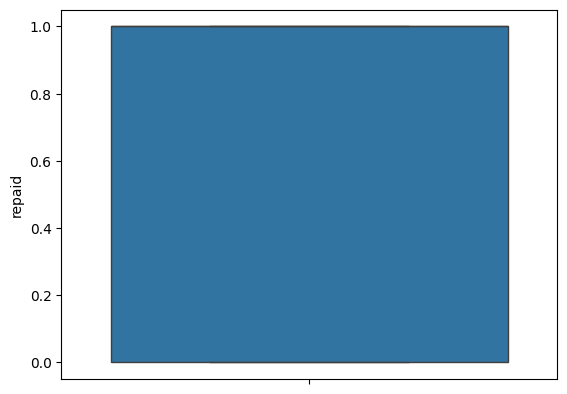

In [9]:
# boxplot for "repaid" column
seaborn.boxplot(df["repaid"])

<Axes: xlabel='repaid', ylabel='Count'>

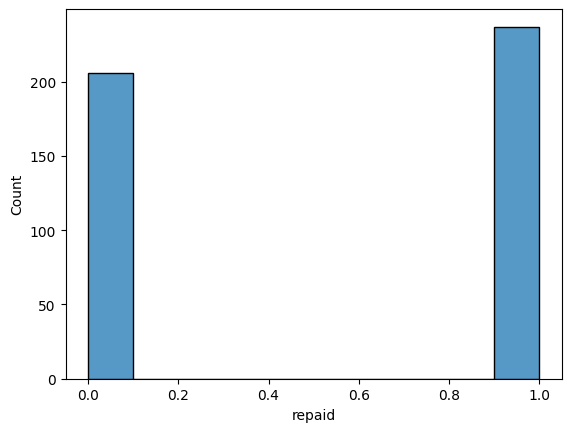

In [10]:
seaborn.histplot(df["repaid"])

<Axes: ylabel='rate'>

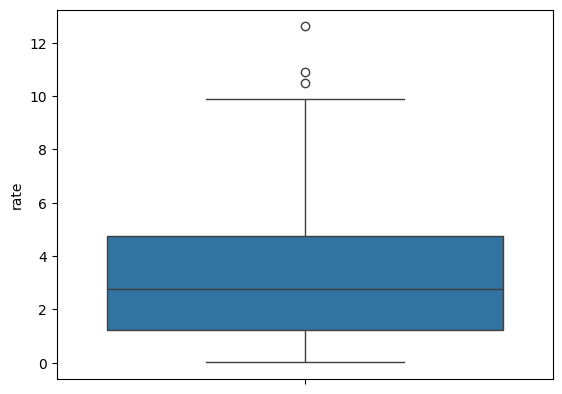

In [11]:
# boxplot for "rate" column
seaborn.boxplot(df["rate"])

<Axes: xlabel='rate', ylabel='Count'>

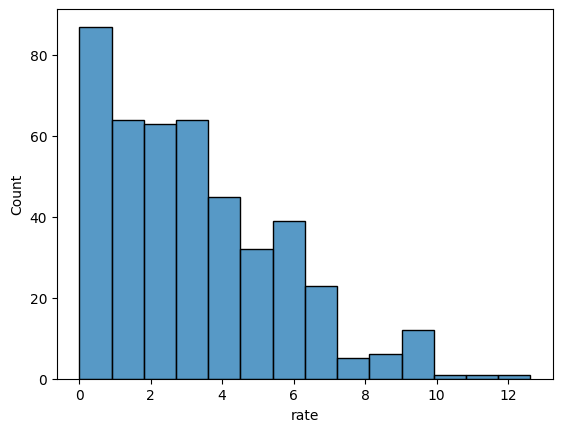

In [12]:
seaborn.histplot(df["rate"])

### Findings: As seen, there are no outliers in any of the columns with numeric data.





### 4.   Variable Transformation
#### In this section we must do 3 things:
1. Drop columns that are not necessary for our model like: client_id, loan_id.
2. Create a new column named 'days' by calculating the number of days that a loan is repaid by taking it from columns loan_start and loan_end.
3. Create new columns for categorical variable "loan_type"

In [13]:
# Dropping unnecessary columns
df.drop(columns=["client_id","loan_id"] , inplace=True)
df.head()

,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,home,13672,0,2002-04-16,2003-12-20,2.15
1,credit,9794,0,2003-10-21,2005-07-17,1.25
2,home,12734,1,2006-02-01,2007-07-05,0.68
3,cash,12518,1,2010-12-08,2013-05-05,1.24
4,credit,14049,1,2010-07-07,2012-05-21,3.13


In [14]:
# creating the new column "days":
# changing the data type to datetime:
df["loan_start"] = df["loan_start"].astype("datetime64[ns]")
df["loan_end"] = df["loan_end"].astype("datetime64[ns]")

# calculating the number of days for a loan repaimnet:
df["days"] = (df["loan_end"] - df["loan_start"]).dt.days

# dropping the unnecessary columns:
df.drop(columns=["loan_start" , "loan_end"] , inplace=True)

# data frame:
df.head()



,loan_type,loan_amount,repaid,rate,days
0,home,13672,0,2.15,613
1,credit,9794,0,1.25,635
2,home,12734,1,0.68,519
3,cash,12518,1,1.24,879
4,credit,14049,1,3.13,684


In [15]:
# creating new columns for our categorical variable "loan_type"
# One-Hot Encoding:
df_encoded = pd.get_dummies(df , columns=["loan_type"] , dtype="int")

df_encoded


,loan_amount,repaid,rate,days,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,13672,0,2.15,613,0,0,1,0
1,9794,0,1.25,635,0,1,0,0
2,12734,1,0.68,519,0,0,1,0
3,12518,1,1.24,879,1,0,0,0
4,14049,1,3.13,684,0,1,0,0
...,...,...,...,...,...,...,...,...
438,12963,0,2.46,928,0,0,0,1
439,1728,1,5.27,511,0,1,0,0
440,9329,0,5.65,948,0,0,0,1
441,4197,0,4.50,633,0,0,1,0


## Target and feature variables
## X and y


In [16]:
# target variable
y = df_encoded["loan_amount"]
# features
X = df_encoded[["repaid","rate","days","loan_type_cash","loan_type_credit","loan_type_home","loan_type_other"]]
X.head()

,repaid,rate,days,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,0,2.15,613,0,0,1,0
1,0,1.25,635,0,1,0,0
2,1,0.68,519,0,0,1,0
3,1,1.24,879,1,0,0,0
4,1,3.13,684,0,1,0,0



### 5.   Standardization of numeric data




In [18]:
# getting all of the columns names
columns = X . columns

# MinMax Scaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X=X) , columns = columns)

X_scaled


,repaid,rate,days,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,0.0,0.169707,0.224900,0.0,0.0,1.0,0.0
1,0.0,0.098335,0.269076,0.0,1.0,0.0,0.0
2,1.0,0.053132,0.036145,0.0,0.0,1.0,0.0
3,1.0,0.097542,0.759036,1.0,0.0,0.0,0.0
4,1.0,0.247423,0.367470,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
438,0.0,0.194290,0.857430,0.0,0.0,0.0,1.0
439,1.0,0.417129,0.020080,0.0,1.0,0.0,0.0
440,0.0,0.447264,0.897590,0.0,0.0,0.0,1.0
441,0.0,0.356067,0.265060,0.0,0.0,1.0,0.0


### 6. Train Test Split

In [24]:
# train-test split of the dataframe:
X_train, X_test, y_train, y_test = train_test_split (X_scaled , y, test_size=0.33, random_state=1)
print(f"X_train:{X_train.shape} \n y_train:{y_train.shape} \n X_test:{X_test.shape} \n y_test:{y_test.shape}")

X_train:(296, 7) 
 y_train:(296,) 
 X_test:(147, 7) 
 y_test:(147,)
